# FEL Data and Model

In [13]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [14]:
def get_scale(data,lower=-1,upper=1):
    offset =np.nanmin(data,axis=0)
    scale=np.nanmax(data,axis=0)-np.nanmin(data,axis=0)
    return offset, scale
def scale_data(data,offset,scale,lower=-1,upper=1):
    data_scaled=lower + ((data-offset)*(upper-lower)/scale)
    return data_scaled
def unscale_data(data,offset,scale,lower=-1,upper=1):
    data_unscaled=(((data-lower)*scale)/(upper-lower)) + offset
    return data_unscaled

In [15]:
# input names for PVs; output is gas detector
x_names = np.load('control_names.npy',allow_pickle=True)

In [16]:
x_names

array(['ACCL_IN20_400_L0B_ADES', 'ACCL_LI21_1_L1S_ADES',
       'ACCL_LI21_1_L1S_PDES', 'ACCL_LI22_1_ADES', 'ACCL_LI22_1_PDES',
       'ACCL_LI25_1_ADES', 'ACCL_LI25_1_PDES', 'BEND_LI21_231_EDES',
       'BEND_DMP1_400_BDES', 'BLEN_LI21_265_AIMAX1H',
       'BLEN_LI24_886_BIMAX1H', 'BPMS_DMP1_693_TMIT1H',
       'BPMS_LI21_201_TMIT1H', 'BPMS_LI21_278_TMIT1H',
       'CAMR_IN20_186_SUM', 'CAMR_IN20_186_XRMS', 'CAMR_IN20_186_YRMS',
       'CATH_IN20_111_QE', 'COLL_LI21_235_LVPOS', 'COLL_LI21_236_LVPOS',
       'DCHP_LTU1_545_DS_GW_RBK', 'DCHP_LTU1_545_US_GW_RBK',
       'DCHP_LTU1_555_DS_GW_RBK', 'DCHP_LTU1_555_US_GW_RBK',
       'FBCK_FB04_LG01_CHIRPDES', 'FBCK_FB04_LG01_DL2VERNIER',
       'FBCK_FB04_LG01_S3DES', 'FOIL_LI24_804_LVPOS',
       'FOIL_LI24_804_MOTR.VAL', 'FOIL_LI24_807_LVPOS',
       'FOIL_LI24_807_MOTR.VAL', 'LASR_IN20_196_PWR1H',
       'LASR_LR20_1_UV_LASER_MODE', 'LGPS_IN20_1_BACT',
       'LGPS_IN20_2_BACT', 'PMTR_LR20_121_PWR', 'PMTR_LR20_135_PWR',
       'QUAD_IN20

In [17]:
model = keras.models.load_model('gdet_model.h5')

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 76)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                4620      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 10,551
Trainable params: 10,551
Non-trainable params: 0
_________________________________________________________________


In [10]:
# full scale data
X_ = np.load('X_fel.npy')  
Y_ = np.load('Y_fel.npy')

In [19]:
# scaled data
x_ = np.load('x_.npy')  
y_ = np.load('y_.npy')

In [23]:
offset_x = np.load('offset_x.npy')
offset_y = np.load('offset_y.npy')
scale_x = np.load('scale_x.npy')
scale_y = np.load('scale_y.npy')

In [24]:
x_ = scale_data(X_,offset_x,scale_x)
y_ = scale_data(Y_,offset_y,scale_y)

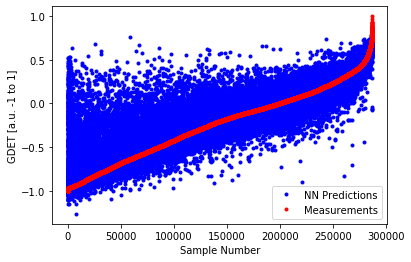

In [25]:
pred = model.predict(x_)
idx=np.argsort(y_[:,0])
plt.plot(pred[idx], 'b.')
plt.plot(y_[idx],'r.')
plt.ylabel('GDET [a.u. -1 to 1]')
plt.xlabel('Sample Number')
plt.legend(['NN Predictions','Measurements'])
plt.show()